In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms as T

import os
cwd=os.getcwd()
os.chdir(cwd[:len('StableRemaster')+cwd.find('StableRemaster')])

from tqdm import tqdm

from diffusers import StableDiffusionInpaintPipeline
from PIL import Image

In [2]:
os.getcwd()

'C:\\Users\\Nathan Paull\\github\\personal\\StableRemaster'

In [3]:
from src import *

In [4]:
DATA_PATH = './data/02_scenes/'

In [5]:
torch.cuda.is_available()

True

In [6]:
cap_path = f'{DATA_PATH}popeye-Scene-006.mp4'
frames = split_video(cap_path)

In [7]:
frames[0].shape

(480, 640, 3)

In [8]:
resized_frames = []
for frame in frames:
    resized = cv2.resize(frame, (940,720), interpolation = cv2.INTER_AREA)
    resized_frames.append(resized)

In [9]:
segmenter = background_segmentation_loader()

In [10]:
resized.shape

(720, 940, 3)

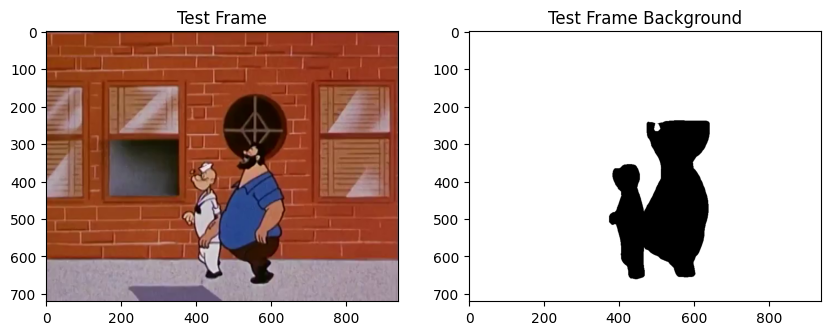

In [11]:
test_frame1 = resized_frames[0]

bg1,bg_mask1 = segmenter(test_frame1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(test_frame1, cmap='gray')
ax1.set_title('Test Frame')

ax2.imshow(bg_mask1, cmap='gray')
ax2.set_title('Test Frame Background')

# show the figure
plt.show()

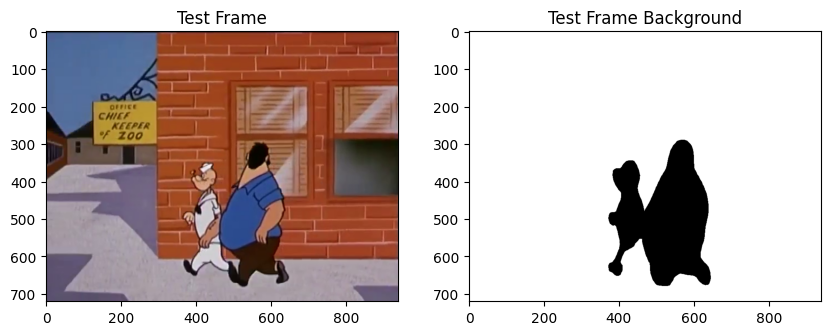

In [12]:
test_frame2 = resized_frames[-1]

bg2, bg_mask2 = segmenter(test_frame2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(test_frame2, cmap='gray')
ax1.set_title('Test Frame')

ax2.imshow(bg_mask2, cmap='gray')
ax2.set_title('Test Frame Background')

# show the figure
plt.show()

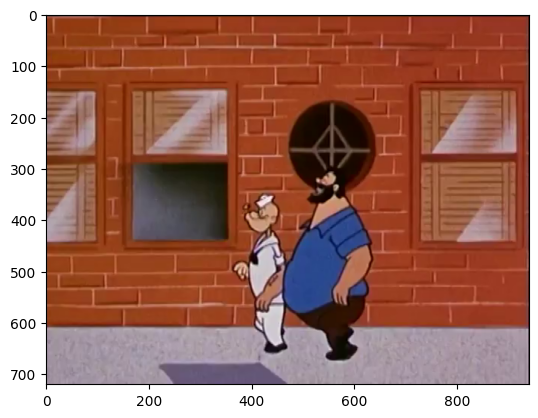

In [16]:
plt.imshow(resized_frames[0])

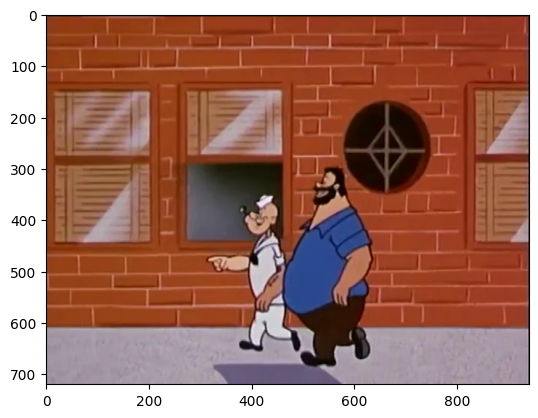

In [23]:
plt.imshow(resized_frames[10],'gray')

In [24]:
gray1 = cv2.cvtColor(resized_frames[0], cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(resized_frames[10], cv2.COLOR_BGR2GRAY)

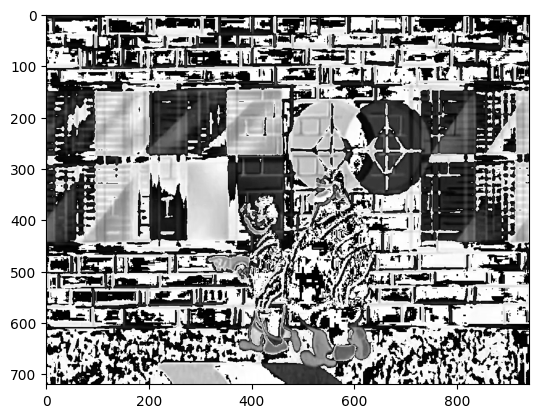

In [25]:
plt.imshow(gray1-gray2,'gray')

In [13]:
stitched_im, stitched_mask, M = stitch_images(test_frame1, test_frame2, bg_mask1, bg_mask2)

In [14]:
masks = []
bgs = []
for frame in tqdm(resized_frames):
    bg, bg_mask = segmenter(frame,mask_conf=0.2,cat_conf=0.4)
    masks.append(bg_mask)
    bgs.append(bg)

100%|██████████| 68/68 [00:07<00:00,  9.03it/s]


In [15]:
total_bg, total_mask, Ms = stitch_multiple(resized_frames, masks)

  4%|▍         | 3/67 [00:01<00:23,  2.77it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


  6%|▌         | 4/67 [00:01<00:24,  2.59it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


  7%|▋         | 5/67 [00:01<00:24,  2.53it/s]

Not enough good matches found to stitch the images.
# of good matches: 2


  9%|▉         | 6/67 [00:02<00:24,  2.46it/s]

Not enough good matches found to stitch the images.
# of good matches: 0


 10%|█         | 7/67 [00:02<00:24,  2.46it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 12%|█▏        | 8/67 [00:03<00:24,  2.42it/s]

Not enough good matches found to stitch the images.
# of good matches: 0


 13%|█▎        | 9/67 [00:03<00:24,  2.40it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 15%|█▍        | 10/67 [00:03<00:23,  2.40it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 16%|█▋        | 11/67 [00:04<00:23,  2.39it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 18%|█▊        | 12/67 [00:04<00:22,  2.40it/s]

Not enough good matches found to stitch the images.
# of good matches: 3


 19%|█▉        | 13/67 [00:05<00:22,  2.37it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 21%|██        | 14/67 [00:05<00:22,  2.38it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 22%|██▏       | 15/67 [00:06<00:21,  2.37it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 24%|██▍       | 16/67 [00:06<00:21,  2.38it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 25%|██▌       | 17/67 [00:06<00:20,  2.39it/s]

Not enough good matches found to stitch the images.
# of good matches: 1


 27%|██▋       | 18/67 [00:07<00:20,  2.36it/s]

Not enough good matches found to stitch the images.
# of good matches: 2


 28%|██▊       | 19/67 [00:07<00:20,  2.36it/s]

Not enough good matches found to stitch the images.
# of good matches: 2


 61%|██████    | 41/67 [05:43<03:37,  8.37s/it]


KeyboardInterrupt: 

In [ ]:
plt.imshow(total_bg,'gray')

In [ ]:
plt.imshow(total_mask,'gray')

In [ ]:
def get_new_window_padding(frame_shape):
    new_width = frame_shape[0]*16//9
    padding = (new_width-frame_shape[1])//2
    return padding

def get_new_window_mask(frame_shape):
    new_width = frame_shape[0]*16//9
    new_window_mask = np.ones((frame_shape[0],new_width))
    left_bar = (new_width-frame_shape[1])//2
    right_bar = new_width-left_bar
    new_window_mask[:,left_bar:right_bar]=0
    return new_window_mask

In [ ]:
new_window_mask=get_new_window_mask(test_frame1.shape)
plt.imshow(new_window_mask,'gray')

In [ ]:
pipe = get_sd_pipe()

In [ ]:
def get_sample_boxes(frame_shape, sample_shape):
    assert(sample_shape[1]<frame_shape[1])
    assert(sample_shape[0]<frame_shape[0])
    x_samples = np.ceil(frame_shape[1]/sample_shape[1]).astype(int)
    y_samples = np.ceil(frame_shape[0]/sample_shape[0]).astype(int)
    
    x_pix_overlap = x_samples*sample_shape[1]-frame_shape[1]
    y_pix_overlap = y_samples*sample_shape[0]-frame_shape[0]
    
    x_pix_offset = x_pix_overlap//(x_samples-1)
    y_pix_offset = y_pix_overlap//(y_samples-1)
    
    x_starts = np.zeros(x_samples)
    y_starts = np.zeros(y_samples)
    
    for i in range(1,len(x_starts)):
        x_starts[i]=i*sample_shape[1]-x_pix_offset*i
        if x_pix_offset!=x_pix_overlap:
            x_starts[i]-=1
            x_pix_overlap-=1
            
    for i in range(1,len(y_starts)):
        y_starts[i]=i*sample_shape[0]-y_pix_offset*i
        if y_pix_offset!=y_pix_overlap:
            y_starts[i]-=1
            y_pix_overlap-=1
    
    box_starts = np.array(np.meshgrid(y_starts, x_starts)).T.reshape(-1, 2).astype(int)
    
    return box_starts

def outpaint_frame(frame, mask, sample_width=768, sample_height=512, pipe=None):
    frame=frame.copy()
    mask=mask.copy()
    sample_starts = get_sample_boxes(frame.shape[0:2],[sample_height,sample_width])
    for (y,x) in sample_starts:
        sub_frame = frame[y:(y+sample_height),x:(x+sample_width),:]
        sub_mask = mask[y:(y+sample_height),x:(x+sample_width)]
        if np.any(sub_mask):
            sub_frame = Image.fromarray(sub_frame).convert("RGB")
            sub_mask = Image.fromarray(sub_mask).convert("RGB")

            new_sub_frame = pipe(prompt='animated iceberg background',image=sub_frame, 
                                 mask_image=sub_mask,height=sample_height,width=sample_width).images[0]
            frame[y:(y+sample_height),x:(x+sample_width),:] = np.array(new_sub_frame)
            mask[y:(y+sample_height),x:(x+sample_width)]=0
    return frame

In [ ]:
def resample_frame(frame,mask,M, total_bg, total_mask, pipe):
    total_bg = total_bg.copy()
    total_mask = total_mask.copy()
    shape = frame.shape
    
    #need to pad total_bg and total_mask as well
    mask = (mask*-1+1).astype('uint8')
    p_frame, p_mask = get_pad_frame(frame,mask)
    _,inv_mask = get_pad_frame(frame,np.zeros(mask.shape))
    #inv_mask = p_mask.copy()
    
    s_mask = p_mask.copy()
    s_mask[:,:]=1
    # transform frame and mask?
    h, w = total_bg.shape[:2]
    h0,w0 = p_frame.shape[:2]
    #t_frame = cv2.warpAffine(p_frame, M, (w,h))
    t_mask = cv2.warpAffine(p_mask, M, (w,h))
    s_mask = cv2.warpAffine(s_mask,M,(w,h))
    # and mask w/ total_mask, then send to stable diffusion
    sd_mask = cv2.bitwise_and(t_mask , t_mask , mask = total_mask).astype('uint8')
    #send to stable diffusion w/ total_bg (only if the mask isn't all 0s?)
    
    #return t_frame,t_mask,sd_mask
    if np.any(sd_mask):
        sd_mask=sd_mask*255
        total_bg = outpaint_frame(total_bg, sd_mask, pipe=pipe)
        sd_mask=sd_mask//255
        sd_mask = (-1*sd_mask+1).astype('uint8')
        total_mask = cv2.bitwise_and(total_mask,sd_mask)
    
    # sample new total_bg using mask
    s_mask[np.where(s_mask>0)]=1
    sampled_bg = cv2.bitwise_and(total_bg , total_bg , mask = s_mask).astype('uint8')
    
    #return total_bg2, sampled_pixels, total_mask2
    # add this sample to frame
    #new_frame = np.sum([sampled_pixels, t_frame],axis=0)
    #print(shape)
    #frame_start = [((new_frame.shape[0]-shape[0])//2),((new_frame.shape[1]-shape[1])//2)]
    #new_frame[frame_start[0]:(frame_start[0]+shape[0]),frame_start[1]:(frame_start[1]+shape[1]),:]=frame
    # reverse affine transformation
    M_inv = get_inv_trans(M)
    #print(M_inv.dtype)
    #return new_frame, total_bg2
    new_bg = cv2.warpAffine(sampled_bg.astype('uint8'), M_inv.astype('float64'), (w0,h0))
    idx = np.where(inv_mask>0)
    p_frame[idx]=new_bg[idx]
    # return frame alone
    return p_frame, total_bg, total_mask

def get_pad_frame(frame, mask):
    padding = get_new_window_padding(frame.shape)
    padded_frame = np.pad(frame, 
                             ((0,0),(padding,padding),(0,0)),
                             'constant',
                             constant_values=0)
    padded_mask = np.pad(mask, 
                             ((0,0),(padding,padding)),
                             'constant',
                             constant_values=1)
    return padded_frame, padded_mask

def prepare_total_resample(total_bg, total_mask, padding):
    total_mask = (total_mask*-1+1).astype('uint8')
    
    padded_bg = np.pad(total_bg, 
                             ((0,0),(padding,padding),(0,0)),
                             'constant',
                             constant_values=0)
    padded_mask = np.pad(total_mask, 
                             ((0,0),(padding,padding)),
                             'constant',
                             constant_values=1)
    return padded_bg, padded_mask

def get_inv_trans(M):
    R_inv = np.copy(M[:,:2]).T
    
    T_inv = np.zeros([2,1]) 
    T_inv[0,0] = -1*M[0,2]*M[0,0] - M[1,2]*M[0,1]
    T_inv[1,0] = -1*M[0,2]*M[0,0] + M[1,2]*M[0,1]
    
    M_inv = np.concatenate([R_inv,T_inv],axis=1)
    
    return M_inv

In [ ]:
def save_im(A, name, folder):
    im = Image.fromarray(A)
    im.save(f"{folder}/{name}.png")

In [ ]:
folder = 'popeye'

In [ ]:
plt.imshow(total_bg)

In [ ]:
Ms[0].dtype

In [ ]:
p_frame, p_mask = get_pad_frame(test_frame1,bg_mask1)

In [ ]:
plt.imshow(p_frame)

In [ ]:
padding = get_new_window_padding(test_frame1.shape)
total_bg,total_mask = prepare_total_resample(total_bg,total_mask,padding)

In [ ]:
new_frame, new_bg, new_mask = resample_frame(test_frame1,bg_mask1, Ms[0], total_bg, total_mask, pipe)

In [ ]:
plt.imshow(new_frame,'gray')

In [ ]:
plt.imshow(new_bg,'gray')

In [ ]:
save_im(p_frame,'padded_frame',folder)
save_im(new_frame,'new_frame',folder)

In [ ]:
low_frames=[]
low_mask=[]
low_Ms=[]
for i in range(0,len(frames),(len(frames)//9)):
    low_frames.append(frames[i])
    low_mask.append(masks[i])
    low_Ms.append(Ms[i])

In [ ]:
len(low_frames)

In [ ]:
new_frames = [new_frame]
for i in range(1,len(low_frames)):
    new_frame, new_bg, new_mask = resample_frame(low_frames[i],low_mask[i], low_Ms[i], new_bg, new_mask, pipe)
    new_frames.append(new_frame)

In [ ]:
for i,f in enumerate(new_frames):
    save_im(f,f'{i}_newframe',folder)

In [ ]:
plt.imshow(new_frames[-1])

In [ ]:
plt.imshow(new_frames[0])

In [ ]:
new_frames[0].shape